# Preliminary study on Rubin's theory

## Import Packages 

In [1]:
import pandas as pd 
from autoc.explorer import cserie,DataExploration
from autoc.utils.helpers import *
from autoc.naimputer import *
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
matplotlib.style.use('ggplot')
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12.0, 8)
np.random.seed(0)

### Approach

The goal of this Notebook is to study Little & Rubin's missing data theory. It is based on the idea that missing values in a dataset have a hypothetical hidden value, which we simulate by deleting some values more or less randomly in a full dataset. We then use graphical and numerical tools to detect Missing Completely At Random (MCAR) mechanisms and study the impact of missing values on distributions.


### Index

#### I- Give me some credit Data : presentation
* Description of the features
* Exploration  : further understanding of the Dataset

#### II- Transformation of the Dataset
* Bin true numeric variables
* Simulate missing values

#### III- Spotting MCAR data

* Graphical indicators : missing maps and corrplots
* Statistical tests : t-test and K-S.
* Compare distributions before/after : graphics and JSD.

## I- Give me some credit Data : presentation

#### Data from Kaggle : "Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years."

https://www.kaggle.com/c/GiveMeSomeCredit


In [2]:
# Load Give me some credit
path = '/Users/Damien/Google Drive/Auto_clean/Datasets/Give_Me_Some_Credit/cs-training.csv'
df_train = pd.read_csv(path)

In [3]:
df_train.shape # 150 000 observations of 11 features

(150000, 11)

In [4]:
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
3,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
4,0,0.907239,49,1,0.024926,63588,7,0,1,0,0


In [5]:
df_train=df_train.iloc[:,[2,10,5,4,6,1,8,3,9,7,0]]

In [6]:
df_train.head(10)

,age,NumberOfDependents,MonthlyIncome,DebtRatio,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,SeriousDlqin2yrs
0,45,2,9120,0.802982,13,0.766127,6,2,0,0,1
1,40,1,2600,0.121876,4,0.957151,0,0,0,0,0
2,38,0,3042,0.085113,2,0.658180,0,1,0,1,0
3,30,0,3300,0.036050,5,0.233810,0,0,0,0,0
4,49,0,63588,0.024926,7,0.907239,1,1,0,0,0
5,74,1,3500,0.375607,3,0.213179,1,0,0,0,0
6,57,0,NaN,5710.000000,8,0.305682,3,0,0,0,0
7,39,0,3500,0.209940,8,0.754464,0,0,0,0,0
8,27,NaN,NaN,46.000000,2,0.116951,0,0,0,0,0
9,57,2,23684,0.606291,9,0.189169,4,0,0,0,0


In [7]:
df = df_train.copy() # for concise display
df.columns=['AGE','ND','MI','DR','NOCLL','RUOUL','NRELL','NOT3059','NOT6098','NOT90','SD2']

In [8]:
df.head(10)

,AGE,ND,MI,DR,NOCLL,RUOUL,NRELL,NOT3059,NOT6098,NOT90,SD2
0,45,2,9120,0.802982,13,0.766127,6,2,0,0,1
1,40,1,2600,0.121876,4,0.957151,0,0,0,0,0
2,38,0,3042,0.085113,2,0.658180,0,1,0,1,0
3,30,0,3300,0.036050,5,0.233810,0,0,0,0,0
4,49,0,63588,0.024926,7,0.907239,1,1,0,0,0
5,74,1,3500,0.375607,3,0.213179,1,0,0,0,0
6,57,0,NaN,5710.000000,8,0.305682,3,0,0,0,0
7,39,0,3500,0.209940,8,0.754464,0,0,0,0,0
8,27,NaN,NaN,46.000000,2,0.116951,0,0,0,0,0
9,57,2,23684,0.606291,9,0.189169,4,0,0,0,0


#### Description of the features

In [9]:
path2='/Users/Damien/Google Drive/Auto_clean/Datasets/Give_Me_Some_Credit/Data Dictionary.xls'
table=pd.read_excel(path2)
pd.options.display.max_colwidth = 200 
table=table.iloc[[2,10,5,4,6,1,8,3,9,7,0],:].reset_index().drop('index',axis=1)
table

,Variable Name,Description,Type
0,age,Age of borrower in years,integer
1,NumberOfDependents,"Number of dependents in family excluding themselves (spouse, children etc.)",integer
2,MonthlyIncome,Monthly income,real
3,DebtRatio,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
4,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
5,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
6,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans including home equity lines of credit,integer
7,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
8,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days past due but no worse in the last 2 years.,integer
9,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or more past due.,integer


### Exploration  : further understanding of the Dataset
using auto-clean package. See ... notebook for a complete description of the package

In [10]:
exploration = DataExploration(df_train)

In [11]:
exploration.structure() # 'Monthly Income' and 'Number of Dependents' have NaNs (i.e missing values here)

,dtypes_p,dtypes_r,nb_missing,perc_missing,nb_unique_values,constant_columns,na_columns,is_key,dtype_infer
age,int64,numeric,0,0.000000,86,False,False,False,floating
NumberOfDependents,float64,numeric,3924,0.026160,13,False,False,False,floating
MonthlyIncome,float64,numeric,29731,0.198207,13594,False,False,False,floating
DebtRatio,float64,numeric,0,0.000000,114194,False,False,False,floating
NumberOfOpenCreditLinesAndLoans,int64,numeric,0,0.000000,58,False,False,False,floating
RevolvingUtilizationOfUnsecuredLines,float64,numeric,0,0.000000,125728,False,False,False,floating
NumberRealEstateLoansOrLines,int64,numeric,0,0.000000,28,False,False,False,floating
NumberOfTime30-59DaysPastDueNotWorse,int64,numeric,0,0.000000,16,False,False,False,floating
NumberOfTime60-89DaysPastDueNotWorse,int64,numeric,0,0.000000,13,False,False,False,floating
NumberOfTimes90DaysLate,int64,numeric,0,0.000000,19,False,False,False,floating


In [73]:
df.describe().apply(np.round, decimals=1)
# Some max values extremely high

,AGE,ND,MI,DR,NOCLL,RUOUL,NRELL,NOT3059,NOT6098,NOT90,SD2
count,150000.0,146076.0,120269.0,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0
mean,52.3,0.8,6670.2,353.0,8.5,6.0,1.0,0.4,0.2,0.3,0.1
std,14.8,1.1,14384.7,2037.8,5.1,249.8,1.1,4.2,4.2,4.2,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,41.0,0.0,3400.0,0.2,5.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,52.0,0.0,5400.0,0.4,8.0,0.2,1.0,0.0,0.0,0.0,0.0
75%,63.0,1.0,8249.0,0.9,11.0,0.6,2.0,0.0,0.0,0.0,0.0
max,109.0,20.0,3008750.0,329664.0,58.0,50708.0,54.0,98.0,98.0,98.0,1.0


In [74]:
exploration.dfquantiles(100).tail().apply(np.round, decimals=1)

,age,NumberOfDependents,MonthlyIncome,DebtRatio,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,SeriousDlqin2yrs
0.96,79,3,15636.3,2791,19,1.0,3,2,1,1,1
0.97,81,3,17000.0,3225,20,1.0,3,2,1,1,1
0.98,84,4,19600.0,3839,22,1.0,4,3,1,2,1
0.99,87,4,25000.0,4979,24,1.1,4,4,2,3,1
1.00,109,20,3008750.0,329664,58,50708.0,54,98,98,98,1


In [14]:
# Are the max values abnormal ? 
df_train['NumberOfDependents'].sort_values(na_position='first').tail(10)

42166      9
122768     9
44848      9
10618     10
123911    10
12982     10
39095     10
22698     10
128034    13
6299      20
Name: NumberOfDependents, dtype: float64

In [15]:
df_train['MonthlyIncome'].sort_values(na_position='first').tail(10)
# Ordered values seem to be continuous right up to the max value...s

37078      629000
119136     649587
96549      699530
93564      702500
123291     730483
122543     835040
50640     1072500
111365    1560100
137140    1794060
73763     3008750
Name: MonthlyIncome, dtype: float64

In [16]:
exploration.nearzerovar() 
# Here, the two near-zero variance columns are filled with zeros except for a small fraction of the values.
# Also, the non-zero values only have around 15 unique values for 150 000 observations.

# Predictors with low variances are considered to be insignificant since they have a low predictive power.
# It is better to delete them because some packages do not deal with variances close to zero.

                                      freq_ratio    nzv  percent_unique  \
age                                     1.008145  False        0.057333   
NumberOfDependents                      3.302250  False        0.008667   
MonthlyIncome                           1.309117  False        9.062667   
DebtRatio                              17.960699  False       76.129333   
NumberOfOpenCreditLinesAndLoans         1.027860  False        0.038667   
RevolvingUtilizationOfUnsecuredLines    1.060647  False       83.818667   
NumberRealEstateLoansOrLines            1.073560  False        0.018667   
NumberOfTime30-59DaysPastDueNotWorse    7.859914  False        0.010667   
NumberOfTime60-89DaysPastDueNotWorse   24.846624   True        0.008667   
NumberOfTimes90DaysLate                27.019264   True        0.012667   
SeriousDlqin2yrs                       13.961101  False        0.001333   

                                     zero_var  
age                                     False  
Num

Index([u'NumberOfTime60-89DaysPastDueNotWorse', u'NumberOfTimes90DaysLate'], dtype='object')

In [17]:
exploration.findcorr() # Furthermore, the NZV columns are correlated

['NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTime30-59DaysPastDueNotWorse']

In [18]:
df_corr=df_train.corr()
df_corr.loc['NumberOfTime60-89DaysPastDueNotWorse','NumberOfTime30-59DaysPastDueNotWorse']
# Obviously, correlation very high due to the number of zeros in common and the small variance of both columns.

0.98700544748013852

In [19]:
df_train = df_train.drop('NumberOfTime60-89DaysPastDueNotWorse',axis=1)





 ## II- Transformation of the Dataset 

### 1)  Bin true numeric values

In [20]:
df_train_categoric = df_train.copy()

In [21]:
# Bin true numeric columns 
cols_to_bin = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']
nb_quantiles = 10
for col in cols_to_bin:
    df_train_categoric.loc[:, col] = pd.qcut(df_train_categoric.loc[:,col],nb_quantiles).astype('str')

In [22]:
df_train_categoric.dtypes

age                                       int64
NumberOfDependents                      float64
MonthlyIncome                            object
DebtRatio                                object
NumberOfOpenCreditLinesAndLoans           int64
RevolvingUtilizationOfUnsecuredLines     object
NumberRealEstateLoansOrLines              int64
NumberOfTime30-59DaysPastDueNotWorse      int64
NumberOfTimes90DaysLate                   int64
SeriousDlqin2yrs                          int64
dtype: object

In [23]:
df_train_categoric.head()

,age,NumberOfDependents,MonthlyIncome,DebtRatio,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,SeriousDlqin2yrs
0,45,2,"(9083, 11666]","(0.649, 4]",13,"(0.699, 0.981]",6,2,0,1
1,40,1,"(2005, 3000]","(0.0309, 0.134]",4,"(0.699, 0.981]",0,0,0,0
2,38,0,"(3000, 3800]","(0.0309, 0.134]",2,"(0.445, 0.699]",0,1,1,0
3,30,0,"(3000, 3800]","(0.0309, 0.134]",5,"(0.154, 0.271]",0,0,0,0
4,49,0,"(11666, 3008750]","[0, 0.0309]",7,"(0.699, 0.981]",1,1,0,0


### 2) Simulate missing values

In [323]:
df_simu = df_train_categoric.copy()

In [324]:
N = 15000

# We inject N missing values at random in each column. 
# We have protected our binned categories so that none of them disappear 
# (same number of categories before and after the process)

simulate_na_col(df_simu,list(df_train_categoric.columns),n=N)

age
NumberOfDependents
MonthlyIncome
DebtRatio
NumberOfOpenCreditLinesAndLoans
RevolvingUtilizationOfUnsecuredLines
NumberRealEstateLoansOrLines
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTimes90DaysLate
SeriousDlqin2yrs


In [315]:
df_simu.isnull().sum(axis = 0)

# /!\ NumberOfDepents has N + nb og missing initially there ; 
# Monthly Income doesn't have the same issue since the action of binning has removed the original missing data.

age                                        0
NumberOfDependents                      3924
MonthlyIncome                              0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
RevolvingUtilizationOfUnsecuredLines       0
NumberRealEstateLoansOrLines               0
NumberOfTime30-59DaysPastDueNotWorse       0
NumberOfTimes90DaysLate                    0
SeriousDlqin2yrs                           0
dtype: int64

## III- Spotting MCAR mechanisms

### 1) Graphical indicators

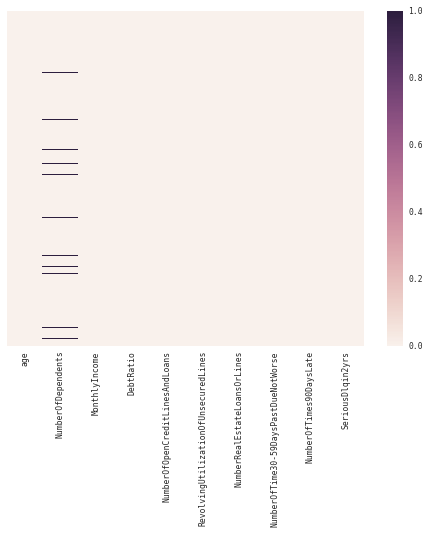

In [341]:
# No injected missing values (only original ones)

missing_map(df_train_categoric,nmax=500,verbose=True, yticklabels=False, figsize=(8, 6))
# Black : missing / White : not missing

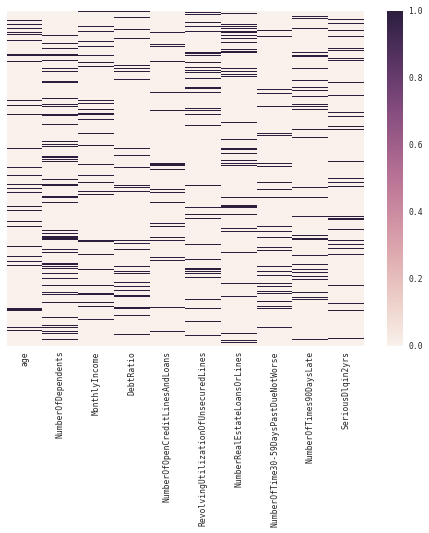

In [345]:
# This is what 11 instances of a MCAR mechanism look like with N/80000 missing values
missing_map(df_simu,nmax=500,verbose=True, yticklabels=False, figsize=(8, 6))

age
NumberOfDependents
MonthlyIncome
DebtRatio
NumberOfOpenCreditLinesAndLoans
RevolvingUtilizationOfUnsecuredLines
NumberRealEstateLoansOrLines
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTimes90DaysLate
SeriousDlqin2yrs


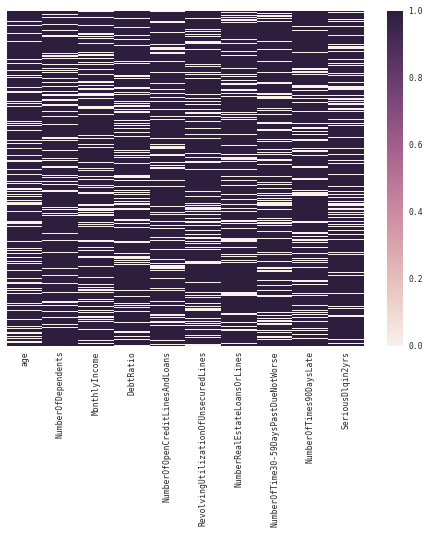

In [274]:
# Now with 80% missing values
df_simu1 = df_train_categoric.copy()
simulate_na_col(df_simu1,list(df_train_categoric.columns),n=120000)
missing_map(df_simu1,nmax=500,verbose=True, yticklabels=False, figsize=(8, 6))

In [286]:
na0 = NaImputer(df_train_categoric)
na= NaImputer(df_simu)
na1= NaImputer(df_simu1)
# We introduce a DataFrame with a binary value corresponding to the missing/not missing characteristic
df_test0= na0.data_isna_m
df_test = na.data_isna_m # merged data and is_na data 
df_test1= na1.data_isna_m
df_na = na.get_data_isna() # is_na columns DataFrame
df_na.head()

['NumberOfDependents']
['age', 'NumberOfDependents', 'MonthlyIncome', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'RevolvingUtilizationOfUnsecuredLines', 'NumberRealEstateLoansOrLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'SeriousDlqin2yrs']
['age', 'NumberOfDependents', 'MonthlyIncome', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'RevolvingUtilizationOfUnsecuredLines', 'NumberRealEstateLoansOrLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'SeriousDlqin2yrs']
['age', 'NumberOfDependents', 'MonthlyIncome', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'RevolvingUtilizationOfUnsecuredLines', 'NumberRealEstateLoansOrLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'SeriousDlqin2yrs']


,is_na_age,is_na_NumberOfDependents,is_na_MonthlyIncome,is_na_DebtRatio,is_na_NumberOfOpenCreditLinesAndLoans,is_na_RevolvingUtilizationOfUnsecuredLines,is_na_NumberRealEstateLoansOrLines,is_na_NumberOfTime30-59DaysPastDueNotWorse,is_na_NumberOfTimes90DaysLate,is_na_SeriousDlqin2yrs
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


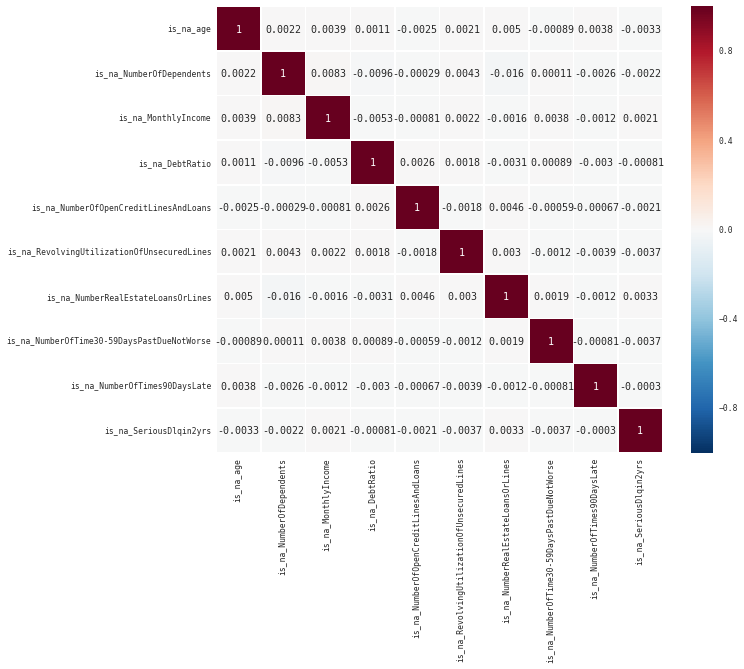

In [348]:
# Are missing values independant ? (Necesary if random)
na.plot_corrplot_na(figsize=(10,8),) 

### 2) Satistical Tests to check if a feature has MCAR values with respect to other features

In [300]:
# If we look at the statistics of a feature when grouped by NumberOfDependents missing or not missing, 
# we notice some differences, but are they significant enough te say both distributions are different ?

na1.get_isna_mean(colname='NumberOfDependents').iloc[0:6,:].apply(np.round, decimals=3)

is_na_NumberOfDependents                   0       1
age                             mean  52.381  54.374
                                std   12.788  14.107
                                sem    0.179   0.089
NumberOfOpenCreditLinesAndLoans mean   6.079   5.922
                                std    4.274   4.029
                                sem    0.059   0.026

In [303]:
# To answer this question we introduce two statistical tests (cf. report for more details). 

In [305]:
# First, Welch's t-test gives an indication to decide if both samples have the same expected mean, 
# assuming they have the same variance.
na0.get_isna_ttest('NumberOfDependents',type_test='ttest').iloc[:,0:2].apply(np.round, decimals=4)

,pvalue,statistic
age,0.0000,0.2286
NumberOfOpenCreditLinesAndLoans,0.0000,0.2717
NumberRealEstateLoansOrLines,0.0000,0.2159
NumberOfTime30-59DaysPastDueNotWorse,0.0000,0.0571
NumberOfTimes90DaysLate,0.9197,0.0089
SeriousDlqin2yrs,0.0523,0.0218


In [306]:
# Second, we consider the Kolmogorov-Smirnov test

na0.get_isna_ttest('NumberOfDependents',type_test='ks').iloc[:,0:2].apply(np.round, decimals=4)

# This statistic indicates whether two samples can be considered to be drawn from the same continuous distribution.
# Here, the statistic is high when the difference between the distributions of a variable, knowing 'NumberOfDependents'
# is missing and the same variable knowing 'NumberOfDependents' is not missing, are high.
# In other words, if the K-S statistic is small or the p-value is high,
# then we accept the hypothesis that the distributions of the two samples are the same.

# In this case, the decision to accept/reject H0 is clear : the first three cannot be considered samples of 
#the same distribution, whereas the last three definitely are.

,pvalue,statistic
age,0.0000,0.2286
NumberOfOpenCreditLinesAndLoans,0.0000,0.2717
NumberRealEstateLoansOrLines,0.0000,0.2159
NumberOfTime30-59DaysPastDueNotWorse,0.0000,0.0571
NumberOfTimes90DaysLate,0.9197,0.0089
SeriousDlqin2yrs,0.0523,0.0218


In [290]:
# The more we inject missing values, the more the distributions get similar
na.get_isna_ttest('NumberOfDependents',type_test='ks').iloc[:,0:2].apply(np.round, decimals=4)

,pvalue,statistic
age,0.0000,0.0942
NumberOfOpenCreditLinesAndLoans,0.0000,0.0719
NumberRealEstateLoansOrLines,0.0000,0.0753
NumberOfTime30-59DaysPastDueNotWorse,0.0000,0.0210
NumberOfTimes90DaysLate,0.9928,0.0035
SeriousDlqin2yrs,0.4835,0.0069


In [301]:
# K-S test on the dataset with 80% missing : 2 new features pass the test compared to 0% missing.
na1.get_isna_ttest('NumberOfDependents',type_test='ttest').iloc[:,0:2].apply(np.round, decimals=4)

,pvalue,statistic
age,0.0000,0.0991
NumberOfOpenCreditLinesAndLoans,0.0949,0.0187
NumberRealEstateLoansOrLines,0.0000,0.0421
NumberOfTime30-59DaysPastDueNotWorse,0.7585,0.0102
NumberOfTimes90DaysLate,0.9819,0.0070
SeriousDlqin2yrs,0.1758,0.0168


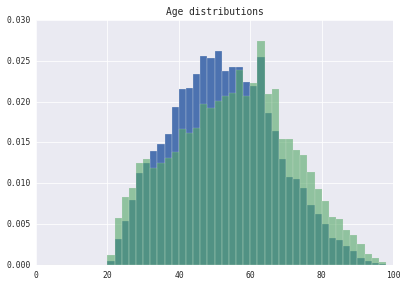

In [363]:
# Graphically, how do the p-values (large or small) translate ?

# Age p-value = 0.000 signifies two different distributions with high probabality
d=df_test.groupby('is_na_NumberOfDependents')['age']
ax=d.get_group(0).hist(normed=True,bins=range(0,100,2),alpha=1)
ax=d.get_group(1).hist(normed=True,bins=range(0,100,2),alpha=0.6)
ax.set_title('Age distributions')

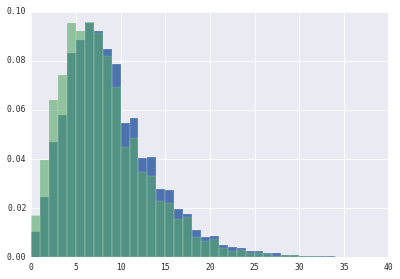

In [282]:
# On the other hand, large p-value implies two identical distributions.
# For NumberOfOpenCreditLinesAndLoans, the test fails (p-value =0.000) when the percentage of injected missing is 10% 
# but succeeds when we set it to 80% (p-value=0.9)

# Graphic for 10% missing : distributions are the same
d=df_test.groupby('is_na_NumberOfDependents')['NumberOfOpenCreditLinesAndLoans']
d.get_group(0).hist(normed=True,bins=range(0,40,1),alpha=1)
d.get_group(1).hist(normed=True,bins=range(0,40,1),alpha=0.6)

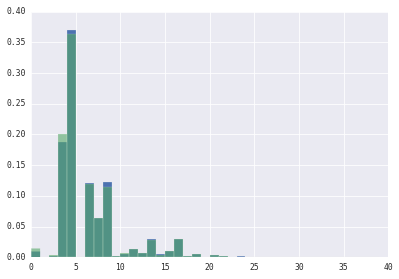

In [352]:
# Graphic for the same feature and 80% injected missing : the distributions have been completely altered,
# reducing the dissimilarity.
d1=df_test1.groupby('is_na_NumberOfDependents')['NumberOfOpenCreditLinesAndLoans']
d1.get_group(0).hist(normed=True,bins=range(0,40,1),alpha=1)
d1.get_group(1).hist(normed=True,bins=range(0,40,1),alpha=0.6)

In [355]:
d1.get_group(1).value_counts().head(7)

4     8977
3     4945
6     2953
8     2836
7     1568
16     742
13     709
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

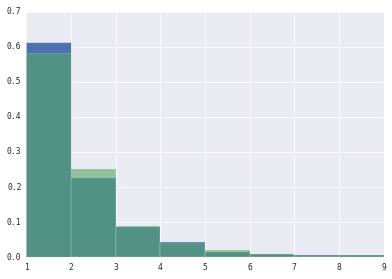

In [230]:
d=df_test.groupby('is_na_NumberOfDependents')['NumberOfTimes90DaysLate'] #.hist(normed=True)
d.get_group(0).hist(normed=True,bins=range(1,10,1),alpha=1)
d.get_group(1).hist(normed=True,bins=range(1,10,1),alpha=0.6)

# Note : change the min_value of the bins to get a better look at the whole distribution
# Even by deleting the zero category (which has most of the values in common), both distribution are very close.

### 3) Distribution comparison before/after NA injection

### Plots

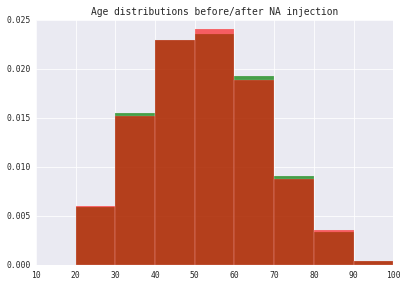

In [182]:
# Example for age distributions
fig, ax = plt.subplots()
ax=df_train['age'].hist(normed=True,alpha=0.7,bins=range(10,110,10),color='green') #Total
plt.title('Age distributions before/after NA injection')
ax=df_simu['age'].hist(normed=True,alpha=0.6,bins=range(10,110,10),color='red') #Missing

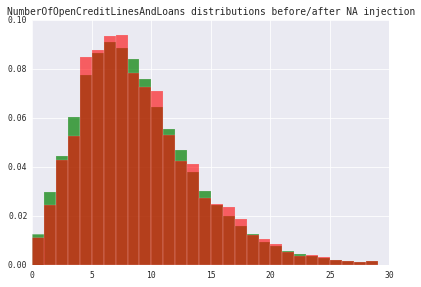

In [183]:
# Example for NumberOfOpenCreditLinesAndLoans distributions
fig, ax = plt.subplots()
ax=df_train['NumberOfOpenCreditLinesAndLoans'].hist(normed=True,bins=range(0,30,1),alpha=0.7,color='green') #Total
plt.title('NumberOfOpenCreditLinesAndLoans distributions before/after NA injection')
ax=df_simu['NumberOfOpenCreditLinesAndLoans'].hist(normed=True,bins=range(0,30,1),alpha=0.6,color='red') #Missing

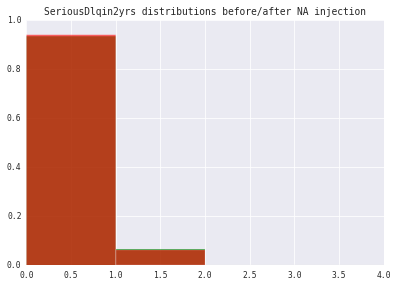

In [350]:
# Example for SeriousDlqin2yrs distributions (binary value)
fig, ax = plt.subplots()
ax=df_train['SeriousDlqin2yrs'].hist(normed=True,bins=range(0,5,1),alpha=0.7,color='green') #Total
plt.title('SeriousDlqin2yrs distributions before/after NA injection')
ax=df_simu['SeriousDlqin2yrs'].hist(normed=True,bins=range(0,5,1),alpha=0.6,color='red') #Missing

### Numerical comparison with JSD

In [307]:
df_train.dtypes

age                                       int64
NumberOfDependents                      float64
MonthlyIncome                           float64
DebtRatio                               float64
NumberOfOpenCreditLinesAndLoans           int64
RevolvingUtilizationOfUnsecuredLines    float64
NumberRealEstateLoansOrLines              int64
NumberOfTime30-59DaysPastDueNotWorse      int64
NumberOfTimes90DaysLate                   int64
SeriousDlqin2yrs                          int64
dtype: object

In [310]:
# The Jensen - Shannon Divergence (JSD) - a measure of similarity between probabilty distributions.
# It's symmetric and bounded between 0 and 1.

# When we know that two samples don't come from the same distribution, we can evaluate a 'distance'
# between both estimated distributions.

for col in df_simu.columns:
    try : 
        print("JSD between both "+col+" distributions:{:0.5f}".format(
                #jsd_series(df_simu.loc[:,col],df_train_categoric.loc[:,col])))
                kl_series(df_simu.loc[:,col],df_train_categoric.loc[:,col])))
    except Exception as e:
        print('error:{}'.format(e))

JSD between both age distributions:0.00066
JSD between both NumberOfDependents distributions:0.00158
JSD between both MonthlyIncome distributions:0.00073
JSD between both DebtRatio distributions:0.00303
JSD between both NumberOfOpenCreditLinesAndLoans distributions:0.00222
JSD between both RevolvingUtilizationOfUnsecuredLines distributions:0.00201
JSD between both NumberRealEstateLoansOrLines distributions:0.00227
JSD between both NumberOfTime30-59DaysPastDueNotWorse distributions:0.00036
JSD between both NumberOfTimes90DaysLate distributions:0.00006
JSD between both SeriousDlqin2yrs distributions:0.00001
